In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

D:\anaconda\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\pytorch\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [2]:
# load dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
# count the number of unique train labels
unique, counts = np.unique(y_train,return_counts=True)
print("Train labels: ",dict(zip(unique,counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [4]:
# count the number of unique test labels
unique, counts = np.unique(y_test,return_counts=True)
print("Test labels: ",dict(zip(unique,counts)))

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [5]:
# sample 25 mnist digits from train dataset
indexes = np.random.randint(0,x_train.shape[0],size=25)
images = x_train[indexes]
labels = y_train[indexes]

In [6]:
labels

array([7, 0, 4, 9, 1, 1, 2, 2, 3, 6, 3, 3, 9, 3, 7, 3, 6, 8, 3, 6, 9, 2,
       5, 9, 5], dtype=uint8)

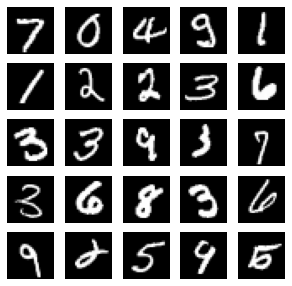

In [7]:
# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5,5,i + 1)
    image = images[i]
    plt.imshow(image,cmap='gray')
    plt.axis('off')

In [8]:
plt.savefig("mnist-samples.png")
plt.show()
plt.close('all')

<Figure size 432x288 with 0 Axes>

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.utils import to_categorical,plot_model

In [10]:
# compute the number of labels
num_labels = len(np.unique(y_train))
num_labels

10

In [11]:
# convert to one-hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# image dimensions (assumed square)
image_size = x_train.shape[1]
input_size = image_size * image_size
image_size

28

In [12]:
# resize and normalize
x_train = np.reshape(x_train,[-1,input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test,[-1,input_size])
x_test = x_test.astype('float32') / 255
print(x_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
# network parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
____

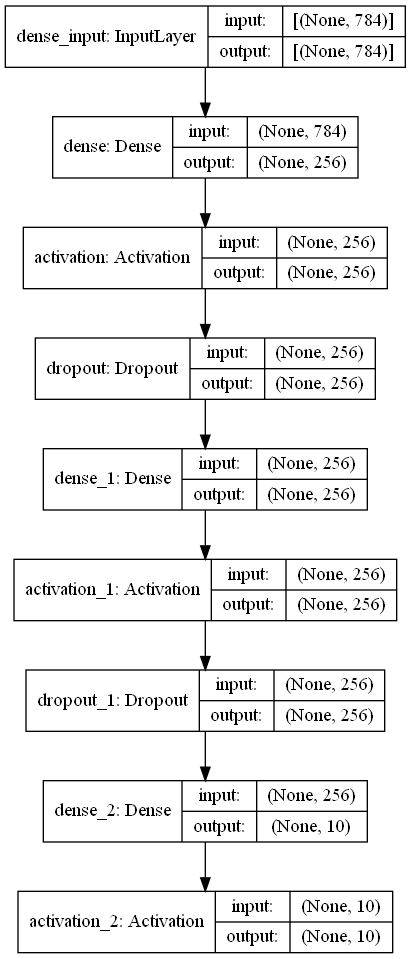

In [14]:
# model is a 3-layer MLP with ReLU and dropout after each layer
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))
# this is the output for one-hot vector
model.add(Activation('softmax'))
model.summary()
plot_model(model,to_file='mlp-mnist.png',show_shapes=True)

In [15]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
# train the network
model.fit(x_train,y_train,epochs=20,batch_size=batch_size)

Epoch 1/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.4255 - acc: 0.8695
Epoch 2/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1944 - acc: 0.9423
Epoch 3/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1524 - acc: 0.9545
Epoch 4/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1309 - acc: 0.9596
Epoch 5/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.1157 - acc: 0.9649
Epoch 6/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.1042 - acc: 0.9675
Epoch 7/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0952 - acc: 0.9695
Epoch 8/20
60000/60000 [==============================] - 1s 20us/sample - loss: 0.0872 - acc: 0.9728
Epoch 9/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0813 - acc: 0.9736
Epoch 10/20
60000/60000 [==============================] - 1s 21us/sample - loss: 

In [16]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,y_test,batch_size=batch_size,verbose=0)
print("\nTest accuracy: %.1f%%" %(100.0 * acc))


Test accuracy: 98.2%


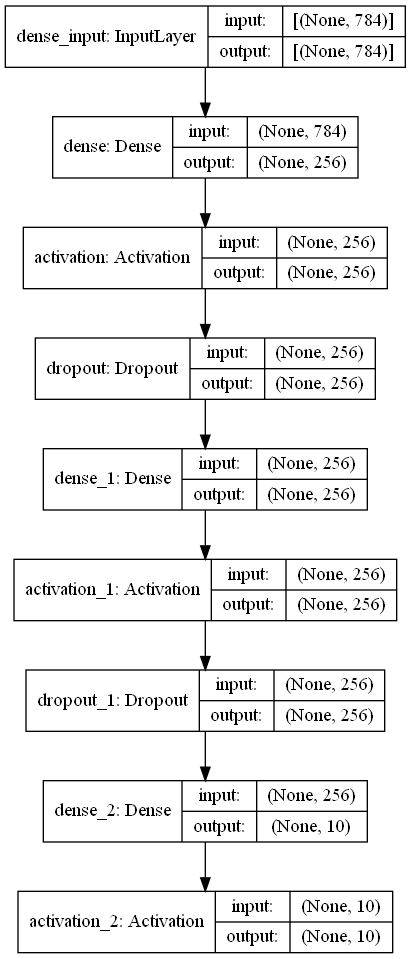

In [17]:
plot_model(model,to_file='mlp-mnist.png',show_shapes=True)